<h1>TECHNICAL REPORT - ANALYSING FAKE NEWS<span class="tocSkip"></span></h1>

Author: Amir Yunus<br>
GitHub: https://github.com/AmirYunus/GA_DSI_Project_2
***

# PREFACE

## Problem Statement

Suppose that a government agency wants to tackle the rise of fake news and scam in the community.

* What is the probability that a set of words would be considered fake?
* Which word is most likely from a fake content?
* Which word has the highest porbability to be predicted wrongly?

## Executive Summary

In [ ]:
# Using Reddit's API for Predicting Comments
# What characteristics of a post on Reddit contribute most to what subreddit it belongs to?
# In this project, we will practice two major skills.

# Collecting data via an API request.
# Building a binary predictor.
# Your method for acquiring the data will be scraping threads from at least two subreddits.

# Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts which subreddit a given post belongs to.

## Contents

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PREFACE" data-toc-modified-id="PREFACE-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PREFACE</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Contents" data-toc-modified-id="Contents-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Contents</a></span></li><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Dictionary</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Functions</a></span></li></ul></li><li><span><a href="#Code" data-toc-modified-id="Code-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Code</a></span></li></ul></div>

## Data Dictionary

## Libraries

In [ ]:
# # import requests
# import json
# # import time
# # import pandas as pd
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# import regex as re
from functions import project_3 as p3

In [ ]:
# from itertools import combinations
# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.feature_extraction import stop_words
# from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
# from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from wordcloud import WordCloud, STOPWORDS
# # from IPython.display import display, Markdown, Latex
# from PIL import Image
# from matplotlib.colors import LinearSegmentedColormap
# from bs4 import BeautifulSoup
# from csv import reader
# from class_p3 import p3

In [ ]:
# # Colour scheme and style selected
# theme = ['#1F306E', '#553772', '#8F3B76', '#C7417B', '#F5487F']
# colors_palette = sns.palplot(sns.color_palette(theme))
# plt.style.use('seaborn')
# sns.set(style="white", color_codes=True)
# sns.set_palette(colors_palette)

# # Prevent warnings from distracting the reader
# warnings.filterwarnings('ignore')

# # Forces Matplotlib to use high-quality images
# ip = get_ipython()
# ibe = ip.configurables[-1]
# ibe.figure_formats = {'pdf', 'png'}

# matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
# pd.set_option('display.max_colwidth', -1)
# pd.options.display.max_rows = 999

## Functions

In [ ]:
# class project_3:
#     def success(n):
#         return display(Markdown(f'<div class="alert alert-block alert-success"><b>SUCCESS: </b>{n}</div>'))

In [ ]:
# Display green box with success
# def success(n):
#     return display(Markdown(f'<div class="alert alert-block alert-success"><b>SUCCESS: </b>{n}</div>'))

In [ ]:
# Display red box with warning
# def warning (n):
#     return display(Markdown(f'<div class="alert alert-block alert-danger"><b>WARNING: </b>{n}</div>'))

In [ ]:
# Display yellow box with check
# def check (n):
#     return display(Markdown(f'<div class="alert alert-block alert-warning"><b>CHECK: </b>{n}</div>'))

In [ ]:
# Display blue box with note
# def note (n):
#     return display(Markdown(f'<div class="alert alert-block alert-info"><b>NOTE: </b>{n}</div>'))    

In [ ]:
# Function to scrape the data 
# def scrape_data(url,after):

#     headers = headers={'User-agent': 'Gauss Markov'} # Set headers to prevent status code error

#     posts = [] # Set posts as an empty list
#     i = 1
#     for _ in range(10): # Each time, it will only scrape 2100 posts. To get 1,000 posts, need to perform 10 times.
#         if after == None: # If after == None, scrape first page
#             params = {}
#         else: # If there are more posts to scrape, set params = after
#             params = {'after' : after}
#         res = requests.get(url, params=params, headers=headers)
#         if res.status_code == 200: # Check if status code == 200
#             data = res.json()
#             posts.extend(data['data']['children'])
#             after = data['data']['after']
            
#         else: # If status code is not 200, display warning and break
#             warning(f'Status Code {res.status_code}')
#             break
            
#         display(Markdown(f'<p style="font-family:courier;"><b>{i}/10:</b> Scraped {len(data["data"]["children"])}</p>'))
#         i += 1
#         time.sleep(3) # Set timeout to 3 to prevent being blocked by reddit
#     success(f'Scraped {len(posts)} posts from {url}') # Display success when scraping is complete
#     return posts # Return list of posts

In [ ]:
# Function to scrape fake posts
# def fake (topic_1, topic_2, topic_3, topic_4, check):
#     topics = [topic_1,topic_2,topic_3,topic_4] # Set reddit topics as a list of topics
#     posts = [] # Set posts as empty list
#     if check == True: # if True, perform scrape
#         for i in topics:
#             after = None # Set after = None, to scrape first page
#             url = "https://www.reddit.com/r/"+i+".json?limit=100" #Set url based on reddit topic
#             note(f'Scraping {url}') # Display note to inform reader that scraping is in process
#             scrape = scrape_data(url, after) # assign list of posts from scrape_data into scrape variable
#             for j in range(len(scrape)): # Loop based on length of scrape variable
#                 posts.append(scrape[j]['data']) # Append only the data of each post in scrape variable into posts
#         df = pd.DataFrame(posts) # Transform posts as DataFrame
# #         df.drop_duplicates(subset='title', inplace=True) # Drop duplicate posts with the same title
#         df['content'] = df.title +" "+ df.selftext # Merge titles and selftext as content
#         df.drop_duplicates(subset='content', inplace=True) # Drop duplicate posts with the same content
# #         check(f'There are {df.shape[0]} posts with {df.shape[1]} columns') # Informs user the shape of the DataFrame
#         df.to_csv(f'../data/fake.csv') # Save DataFrame into csv to import without scraping in the future
#         success(f'All topics scraped') # Display success at end of function
#         return

In [ ]:
# # Function to scrape news posts
# def news (topic_1, topic_2, topic_3, topic_4, check):
#     topics = [topic_1,topic_2,topic_3,topic_4] # Set reddit topics as a list of topics
#     posts = [] # Set posts as empty list
#     if check == True: # if True, perform scrape
#         for i in topics:
#             after = None # Set after = None, to scrape first page
#             url = "https://www.reddit.com/r/"+i+".json?limit=100" #Set url based on reddit topic
#             note(f'Scraping {url}') # Display note to inform reader that scraping is in process
#             scrape = scrape_data(url, after) # assign list of posts from scrape_data into scrape variable
#             for j in range(len(scrape)): # Loop based on length of scrape variable
#                 posts.append(scrape[j]['data']) # Append only the data of each post in scrape variable into posts
#         df = pd.DataFrame(posts) # Transform posts as DataFrame
# #         df.drop_duplicates(subset='title', inplace=True) # Drop duplicate posts with the same title
#         df['content'] = df.title +" "+ df.selftext # Merge titles and selftext as content
#         df.drop_duplicates(subset='content', inplace=True) # Drop duplicate posts with the same content
# #         check(f'There are {df.shape[0]} posts with {df.shape[1]} columns') # Informs user the shape of the DataFrame       
#         df.to_csv(f'../data/news.csv') # Save DataFrame into csv to import without scraping in the future
#         success(f'All topics scraped') # Display success at end of function
#         return

In [ ]:
# # Function to merge DataFrames together
# def merge (df_news,df_fake):
#     # Create the target
#     df_news['is_fake'] = 0 # If news, set is_fake = 0
#     df_fake['is_fake'] = 1 # If fake, set is_fake = 1

#     # Merge the DataFrames
#     df = df_news.append(df_fake, sort=True) # Append df_fake to df_news
#     df = df[['is_fake', 'content']] # Only keep id, content and is_fake columns
#     return df

In [ ]:
# # Function to stop transition, conjunction, preposition and selected words
# def stop (): 
#     # Selected words that are not English or are able to identify if a content is fake or real
#     stop_selected = ['fake','real','deepfake','deepfakes','amp','let','https','de','que','en','el','don','un','re','la','castaña','lo','del']
    
#     # Transitions used in English grammar
#     stop_transition_similar = ['in','the','first','place','not','only','but','also','as','a','matter','of','fact','in','like','manner','in','addition','coupled','with','in','the','same','fashion','in','the','same','way','first','second','third','in','the','light','of','not','to','mention','to','say','nothing','of','equally','important','by','the','same','token','again','to','and','also','then','equally','identically','uniquely','like','as','too','moreover','as','well','as','together','with','of','course','likewise','comparatively','correspondingly','similarly','furthermore','additionally']
#     stop_transition_contradict = ['although','this','may','be','true','in','contrast','different','from','of','course','but','on','the','other','hand','on','the','contrary','at','the','same','time','in','spite','of','even','so','even','though','be','that','as','it','may','then','again','above','all','in','reality','after','all','but','still','unlike','or','yet','while','albeit','besides','as','much','as','even','though','although','instead','whereas','despite','conversely','otherwise','however','rather','nevertheless','nonetheless','regardless','notwithstanding']
#     stop_transition_condition = ['in','the','event','that','granted','that','so','long','as','as','long','as' 'on','condition','on','the','condition','that','for','the','purpose','of','with','this','intention','with','this','in','mind','in','the','hope','that','to','the','end','that','for','fear','that','in','order','to','seeing','that','being','that','in','view','of','if','then','unless','when','whenever','while','because','of','as','since','while','lest','in','case','provided','that','given','that','only','if','even','if','so','that','so','as','to','owing','to','inasmuch','as','due','to']
#     stop_transition_emphasis = ['in','other','words','to','put','it','differently','for','one','thing','as','an','illustration','in','this','case','for','this','reason','to','put','it','another','way','that','is','to','say','with','attention','to','by','all','means','important','to','realize','another','key','point','first','thing','to','remember','most','compelling','evidence','must','be','remembered','point','often','overlooked','to','point','out','on','the','positive','side','on','the','negative','side','with','this','in','mind','notably','including','like','to','be','sure','namely','chiefly','truly','indeed','certainly','surely','markedly','such','as','especially','explicitly','specifically','expressly','surprisingly','frequently','significantly','particularly','in','fact','in','general','in','particular','in','detail','for','example','for','instance','to','demonstrate','to','emphasize','to','repeat','to','clarify','to','explain','to','enumerate']
#     stop_transition_effect = ['as','a','result','under','those','circumstances','in','that','case','for','this','reason','in','effect','for','thus','because','the','then','hence','consequently','therefore','thereupon','forthwith','accordingly','henceforth']
#     stop_trasition_conclusion = ['as','can','be','seen','generally','speaking','in','the','final','analysis','all','things','considered','as','shown','above','in','the','long','run','given','these','points','as','has','been','noted','in','a','word','for','the','most','part','after','all','in','fact','in','summary','in','conclusion','in','short','in','brief','in','essence','to','summarize','on','balance','altogether','overall','ordinarily','usually','by','and','large','to','sum','up','on','the','whole','in','any','event','in','either','case','all','in','all','obviously','ultimately','definitely']
#     stop_transition_time = ['at','the','present','time','from','time','to','time','sooner','or','later','at','the','same','time','up','to','the','present','time','to','begin','with','in','due','time','as','soon','as','as','long','as','in','the','meantime','in','a','moment','without','delay','in','the','first','place','all','of','a','sudden','at','this','instant','first','second','immediately','quickly','finally','after','later','last','until','till','since','then','before','hence','since','when','once','about','next','now','formerly','suddenly','shortly','henceforth','whenever','eventually','meanwhile','further','during','in','time','prior','to','forthwith','straightaway','by','the','time','whenever','until','now','now','that','instantly','presently','occasionally']
#     stop_transition_place = ['in','the','middle','to','the','left','to','the','right','in','front','of','on','this','side','in','the','distance','here','and','there','in','the','foreground','in','the','background','in','the','center','of','adjacent','to','opposite','to','here','there','next','where','from','over','near','above','below','down','up','under','further','beyond','nearby','wherever','around','between','before','alongside','amid','among','beneath','beside','behind','across']
#     stop_transition = stop_transition_similar + stop_transition_contradict + stop_transition_condition + stop_transition_emphasis + stop_transition_effect + stop_trasition_conclusion + stop_transition_time + stop_transition_place
    
#     # Conjunctions used in English grammar
#     stop_conjunction = ['for','and','nor','but','or','yet','so','though','although','even','though','while','if','only','if','unless','until','provided','that','assuming','that','even','if','in','case','that','in','case','lest','than','rather','than','whether','as','much','as','whereas','after','as','long','as','as','soon','as','before','by','the','time','now','that','once','since','till','until','when','whenever','while','because','since','so','that','in','order','that','in','order','why','that','what','whatever','which','whichever','who','whoever','whom','whomever','whose','how','as','though','as','if','where','wherever','as','just as','both','hardly','scarcely','so','when','and','either','or','neither','nor','if','then','not','but','what','with','whether','or','not','only','also','no','sooner','rather','than','also','besides','furthermore','likewise','moreover','however','nevertheless','nonetheless','still','conversely','instead','otherwise','rather','accordingly','consequently','hence','meanwhile','then','therefore','thus']
    
#     # Prepositions used in English grammar
#     stop_prepositions = ['on','in','at','since','until','till','for','ago','during','before','after','to','past','from','by','in','at','on','off','by','beside','under','over','below','above','up','down','across','through','to','into','out','of','onto','towards','from','of','by','about','for','with']
    
#     # Make a list of all stop words
#     stopwords = stop_selected + stop_transition + stop_conjunction + stop_prepositions + list(STOPWORDS)
    
#     return stopwords

In [ ]:
# # Function to display wordcloud
# def show_wordcloud(data,news):
#     news_colour = ['#FFFFFF','#A3CDFF','#D1E6FF','#162F4D','#1F306E'] # 
#     fake_colour = ['#FFFFFF','#FFA6A6','#FFD2D2','#A13030','#E74645']
#     if news == True:
#         theme = news_colour
#     elif news == False:
#         theme = fake_colour
#     else:
#         warning(f'Incorrect input')
#         return
#     wordcloud = WordCloud(
#         background_color='white', # Set background as white
#         stopwords=stop(), # Set stopwords as defined in function
#         max_words=500, # Only show top 50 words
#         max_font_size=100, # Emphasise on common words
#         scale=3, # Determine the scale factor
#         random_state=42, # Set random state as 42
#         colormap=LinearSegmentedColormap.from_list("mycmap", theme), # Define colours
# #         mask=mask
#     ).generate(str(data)) # Generate the string output
#     fig = plt.figure(1, figsize=(16, 9))
#     plt.axis('off')
# #     if title:
# #         fig.suptitle(title, fontsize=20)
# #         fig.subplots_adjust(top=2.3)
#     plt.imshow(wordcloud)
#     plt.show()

In [ ]:
# def clean(content):
#     # Function to convert a raw review to a string of words
#     # The input is a single string (a raw movie review), and 
#     # the output is a single string (a preprocessed movie review)
    
#     # 1. Remove HTML.
#     text = BeautifulSoup(content).get_text()
#     text = re.sub(r'^http:\/\/\S+(\/\S+)*(\/)?$', '', text, flags=re.MULTILINE)
    
#     letters = re.sub(r"US", "United States",text)
#     letters = re.sub(r"LA", "Los Angeles",text)
    
#     # 2. Remove non-letters.
#     letters = re.sub("[^a-zA-Z]", " ",text)
        
#     # 3. Convert to lower case, split into individual words.
#     words = letters.lower().split()
    
#     # 4. In Python, searching a set is much faster than searching
#     # a list, so convert the stop words to a set.
#     stops = stop()
    
#     # 5. Remove stop words.
#     meaningful_words = [w for w in words if not w in stops]
    
#     # 6. Join the words back into one string separated by space, 
#     # and return the result.
#     return(" ".join(meaningful_words))

In [ ]:
# def search (vects,models):
#     use_params = True
#     model_solns = {}
#     idx = 0
#     for v in vects:
# #         for i in range(len(other)+1):
# #         for o in list(v):
#         for m in models:
#             X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=42, stratify=y)
#             idx += 1
#             pipe_items = [v]
# #                 pipe_items.extend(list(o))
#             pipe_items.append(m)
#             [train_score, test_score, y_test, y_test_hat, best_params] = pipeline(pipe_items, use_params,X_train.content, X_test.content,y_train, y_test)
#             model_solns[idx] = {'vectorizer' : v, 'model': m,'train_score': train_score, 'test_score': test_score,'best_params': best_params}
#     success(f'<b>COMPLETED</b>')
#     df_solns = pd.DataFrame(model_solns)
#     df_solns.to_csv(f'../data/gridsearch.csv')
#     return df_solns, X_train, X_test, y_train, train_score, test_score, y_test, y_test_hat, best_params

In [ ]:
# def pipeline(items, use_params, X_train, X_test, y_train, y_test):

#     # Add a pipe, add a param !
#     pipe_items = {
#         'cv': CountVectorizer(stop_words = stop()),
#         'tv': TfidfVectorizer(stop_words = stop()),
#         'hv': HashingVectorizer(stop_words = stop(),alternate_sign=True),

#         'lr' : LogisticRegression(),
#         'bnb' : BernoulliNB(),
#         'mnb' : MultinomialNB(),
#         'gnb' : GaussianNB()
#     }
    
#     # Include at least one param for each pipe item
#     param_items = {
#         'cv' : {
#             'cv__ngram_range' : [(1,1), (1,2)],
#             'cv__max_df' : [0.95, 1.0],
#             'cv__min_df' : [1, 2],
# #             'cv__max_features' : [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,None]
#         },
#         'tv' : {
#             'tv__ngram_range' : [(1,1), (1,2)],
#             'tv__max_df' : [0.95, 1.0],
#             'tv__min_df' : [1, 2],
# #             'tv__max_features' : [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,None]
#         },
#         'hv' : {
#             'hv__ngram_range' : [(1,1), (1,2)]
#         },
#         'lr' : {
#             'lr__C' : [1, .05],
#             'lr__penalty' : ['l2']
#         },
#         'bnb' : {
#             'bnb__alpha' : [1.0, 1.5, 1.8, 2.0]
#         },
#         'mnb' : {
#             'mnb__alpha' : [0.8, 1.0, 1.2]
#         },
#         'gnb' : {
#         },
#     }

#     # Create the parameters for GridSearch
#     params = dict()
#     if use_params:
#         for i in items:
#             for p in param_items[i]:
#                 params[p] = param_items[i][p]

#     # Create the pipeline
#     pipe_list = [(i,pipe_items[i]) for i in items]
#     method = list()
#     for p in pipe_list:
#         method.append(str(p[1]).split('(')[0])
#     display(Markdown(f'<b>Using {method[0]} with {method[1]}</b>'))
#     pipe = Pipeline(pipe_list)

#     # Grid search
#     gs = GridSearchCV(pipe, param_grid=params, verbose=1, pre_dispatch=None, cv=3)
#     gs.fit(X_train, y_train)
  
#     # Print the results
#     train_params = gs.best_params_
#     train_score = gs.best_score_
#     y_test_hat = gs.predict(X_test)
#     test_score = gs.score(X_test, y_test)

#     for k in train_params:
#         print(f"{k}: {train_params[k]}")
#     print("")
#     print(f'Train score: {train_score}')
#     print(f'Test score: {test_score} (Accuracy)')
#     print("")
#     cm = confusion_matrix(y_test, y_test_hat).ravel()
#     tn, fp, fn, tp = cm
#     print(f"True Negatives: {tn}")
#     print(f"False Positives: {fp}")
#     print(f"False Negatives: {fn}")
#     print(f"True Positives: {tp}\n")
    
# #     print(f'Accuracy {(tp+tn)/(tp+tn+fp+fn)}')
    
#     check(f'Completed {method[0]} with {method[1]}')
#     return train_score, test_score, y_test, y_test_hat, train_params


In [ ]:
# def features(df,y):
#     X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=42, stratify=y)
#     cv = CountVectorizer(stop_words=stop())
#     X_train = cv.fit_transform(X_train.content)
#     cv_train = pd.DataFrame(X_train.todense(), columns=cv.get_feature_names())
#     words = list(cv_train.sum().sort_values(ascending=False).index)
#     cv_train['is_fake'] = y_train.values
#     cv_train = cv_train.groupby('is_fake').sum()[words]
#     return words

In [ ]:
# def check_user(vect,df,df_user,y,nb,is_fake=True):
    
#     X = df.content
#     X_user = df_user.content
#     print(X_user)

#     X = vect.fit_transform(X)
#     X_user = vect.transform(X_user)
#     print(X_user)
#     vect_train = pd.DataFrame(X.todense(), columns=vect.get_feature_names())
    
#     print(f"There are {len(vect.get_feature_names())} features in the model.\n")
    
#     nb = MultinomialNB()
#     nb.fit(X, y)
#     y_target = nb.predict(X_user)
    
#     print(y_target)
#     if is_fake == True:
#         df_user['is_fake'] = 1
#     else:
#         df_user['is_fake'] = 0
#     print(X_user)
#     df_user['pred_fake'] = y_target
    
#     return df_user

In [ ]:
# Pre-work. Demonstrate scraping Thread Info from Reddit.com
# Set up a request (using requests) to the URL below.
# *NOTE*: Reddit will throw a [429 error](https://httpstatuses.com/429) when using the following code:

# res = requests.get(URL)
# This is because Reddit has throttled python's default user agent. You'll need to set a custom User-agent to get your request to work.

# res = requests.get(URL, headers={'User-agent': 'YOUR NAME Bot 0.1'})

In [ ]:
# For example:
# pre_work = False
# if pre_work:
#     url = "http://www.reddit.com/r/boardgames.json"
#     headers = headers={'User-agent': 'gbkgwyneth Bot 0.1'}
#     res = requests.get(url, headers=headers)
#     res.status_code

In [ ]:
# Use res.json() to convert the response into a dictionary format and set this to a variable.
# data = res.json()

In [ ]:
# if pre_work:
#     data = res.json()

#     # Some initial exploring of the data
#     ['data', 'kind']
#     sorted(data.keys())

#     ['after', 'before', 'children', 'dist', 'modhash']
#     sorted(data['data'].keys())

#     df = pd.DataFrame(data['data']['children'])
#     df.head()
#     df.shape
#     [post['data']['name'] for post in data['data']['children']]

In [ ]:
# Getting more results
# By default, Reddit will give you the top 25 posts:

# print(len(data['data']['children']))
# If you want more, you'll need to do two things:

# Get the name of the last post: data['data']['after']
# Use that name to hit the following url: http://www.reddit.com/r/boardgames.json?after=THE_AFTER_FROM_STEP_1`
# Create a loop to repeat steps 1 and 2 until you have a sufficient number of posts.
# *NOTE*: Reddit will limit the number of requests per second you're allowed to make. When you create your loop, be sure to add the following after each iteration.

# time.sleep(3) # sleeps 3 seconds before continuing
# This will throttle your loop and keep you within Reddit's guidelines. You'll need to import the time library for this to work!

In [ ]:
# I. Predicting posts from the Cape Cod and Galveston sub-Reddits
# With no experience of Reddit, I had a challenge underatnding how it worked, what people discuss, and what types of "topics" would be interesting to predict. I settled on predicting posts from the r/CapeCod versus the r/galveston. If I were to start-over, I would definitely try to find more interesting topics, but I am not sure that I have yet spent enough time with Reddit to be able to pedict what those might be.

In [ ]:
# I. Gather the raw data from Reddit.
# Save the scraped data as two CSV files or read previously scraped data from CSV files into two DataFrame.

In [ ]:
# Function to scrape the data 

# def scrape_data(url,after):

#     headers = headers={'User-agent': 'Gauss Markov'}

#     posts = []
#     for _ in range(40):
#         if after == None:
#             params = {}
#         else:
#             params = {'after' : after}
#         res = requests.get(url, params=params, headers=headers)
#         if res.status_code == 200:
#             data = res.json()
#             posts.extend(data['data']['children'])
#             after = data['data']['after']
# #             print(after)
#         else:
#             warning(f'Status Code {res.status_code}')
#             break
        
#         time.sleep(3)
#     success(f'Scraping complete {url}')
#     return posts

In [ ]:
# Scrape posts following 'after' from the first URL 
# Place them in a dataframe
# Export to a file

# def scrape (topic_1, topic_2,check):
#     if check == True: 
#         after = None
#         url_1 = "https://www.reddit.com/r/"+topic_1+".json"
#         note(f'Scraping {url_1}')
#         scrape_1 = scrape_data(url_1, after)
#         posts_1 = []
#         for i in range(len(scrape_1)):
#             posts_1.append(scrape_1[i]['data'])
#         df_1 = pd.DataFrame(posts_1)
#         df_1.drop_duplicates(subset='title', inplace=True)
#         df_1.to_csv(f'../data/{topic_1}.csv')

#         after = None
#         url_2 = "https://www.reddit.com/r/"+topic_2+".json"
#         note(f'Scraping {url_2}')
#         scrape_2 = scrape_data(url_2, after)
#         posts_2 = []
#         for i in range(len(scrape_2)):
#             posts_2.append(scrape_2[i]['data'])
#         df_2 = pd.DataFrame(posts_2)
#         df_2.drop_duplicates(subset='title', inplace=True)
#         df_2.to_csv(f'../data/{topic_2}.csv')

In [ ]:
# scrape('worldnews','conspiracy',False)

In [ ]:
# Scrape posts following 'after' from the second URL 
# Place them in a dataframe
# Export to a file

# if scrape:
#     after = None # "t3_35fh6e"
#     url_cape = "https://www.reddit.com/r/Economics.json"
#     scrape_cape  = scrape_data(url_cape,after)

#     posts_cape = []
#     for i in range(len(scrape_cape)):
#         posts_cape.append(scrape_cape[i]['data'])
#     df_cape = pd.DataFrame(posts_cape)
#     df_cape.drop_duplicates(subset='title', inplace=True)
#     df_cape.to_csv(f'../data/economics.csv')

In [ ]:
# If not scraping, read from csv
# if not scrape:
# df_news = pd.read_csv("../data/worldnews.csv")
# df_fake = pd.read_csv("../data/conspiracy.csv")

In [ ]:
# III. Explore the data.
# Use CountVectorizer or TfidfVectorizer from scikit-learn to create features from the thread titles and descriptions (NOTE: Not all threads have a description).

# Create the DataFrame and the target vector
# Where y=1, the post is from r/CapeCod.

In [ ]:
# # Create the target vector 
# df_news['is_fake'] = 0
# df_fake['is_fake'] = 1

# # Merge the datafrmaes
# df = df_news.append(df_fake, sort=True)
# df = df[['is_fake', 'title','id']]
# df.set_index("id", inplace=True)

# # Split the target vector from the dataframe
# y = df['is_fake']
# df.drop('is_fake', inplace=True, axis=1)
# df.head()

In [ ]:
# View the word clouds
# The WordCloud is from Peekaboo.

In [ ]:
# From https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

# remove = ['let','says','will','new','one','day','shut']
# stopwords = remove + list(STOPWORDS)
# # mask = np.array(Image.open("../images/text.png"))
# colors = theme
# cmap = LinearSegmentedColormap.from_list("mycmap", colors)
# def show_wordcloud(data, title = None):
#     wordcloud = WordCloud(
#         background_color='white',
#         stopwords=stopwords,
#         max_words=50,
#         max_font_size=100,
#         scale=3,
#         random_state=1, # chosen at random by flipping a coin; it was heads
#         colormap=cmap,
# #         mask=mask
#     ).generate(str(data))

#     fig = plt.figure(1, figsize=(16, 9))
#     plt.axis('off')
#     if title:
#         fig.suptitle(title, fontsize=20)
#         fig.subplots_adjust(top=2.3)

#     plt.imshow(wordcloud)
#     plt.show()

In [ ]:
# show_wordcloud(df_news['title'])

In [ ]:
# show_wordcloud(df_fake['title'])

In [ ]:
# Why Python and others
# df_gv[df_gv['title'].str.contains("Texas")]
# df_cape[df_cape['title'].str.contains("Texas")]

In [ ]:
# Train/Test split
# X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=42, stratify=y)

In [ ]:
# Run a simple CountVectorizer and explore.

In [ ]:
# cv_simple = CountVectorizer(stop_words=stopwords)
# X_train_cv = cv_simple.fit_transform(X_train['title'])

# cv_train = pd.DataFrame(X_train_cv.todense(), columns=cv_simple.get_feature_names())
# n_words = 20
# words = list(cv_train.sum().sort_values(ascending=False)[:n_words].index)
# cv_train['is_fake'] = y_train.values
# cv_train_small = cv_train.groupby('is_fake').sum()[words]
# cv_train_small.head()

In [ ]:
# Create a dataframe with counts of most common words

In [ ]:
# Create a data frame of the most common words 

# n_words = 20
# words = list(cv_train.sum().sort_values(ascending=False)[:n_words].index)
# cv_train['is_fake'] = y_train.values
# cv_train_small = cv_train.groupby('is_fake').sum()[words]
# cv_train_small.head()

In [ ]:
# Plot the most common words

In [ ]:
# Adapted from https://matplotlib.org/examples/api/barchart_demo.html

# words_fake = words
# words_count_fake = cv_train_small.loc[1]
# words_gv = words
# words_count_news = cv_train_small.loc[0]
# width = 0.35       # the width of the bars
# ind = np.arange(n_words)

# fig, ax = plt.subplots(figsize=(16, 9))
# rects1 = ax.bar(ind, words_count_fake, width, color=theme[0])
# rects2 = ax.bar(ind+width,words_count_news, width, color=theme[-1])

# # add some text for labels, title and axes ticks
# ax.set_ylabel('Counts')
# ax.set_title('Counts by word and reddit')
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels(words,rotation='vertical')

# ax.set_ylim(0,80)

# ax.legend((rects1[0], rects2[0]), ('Fake News', 'World News'))

# plt.show()

In [ ]:
# The most common words are not very surprising - place names.

# Since the beach in Galveston faces southeast, 'sunset' is a Cape Cod term. And Galveston has floating casinos, thus 'gaming'.

In [ ]:
# Run a simple TfidfVectorizer and explore.

In [ ]:
# tv_simple = TfidfVectorizer(stop_words=stopwords)
# X_train_tv = tv_simple.fit_transform(X_train['title'])

# tv_train = pd.DataFrame(X_train_tv.todense(), columns=tv_simple.get_feature_names())
# tv_train.head()

In [ ]:
# Create a dataframe with counts of most frequent words

In [ ]:
# Create a data frame of the most common words 

# n_words = 20
# words = list(tv_train.sum().sort_values(ascending=False)[:n_words].index)
# tv_train['is_fake'] = y_train.values
# tv_train_small = tv_train.groupby('is_fake').sum()[words]
# tv_train_small.head()

In [ ]:
# Plot the most frequent words

In [ ]:
# Adapted from https://matplotlib.org/examples/api/barchart_demo.html

# words_fake = words
# words_count_fake = tv_train_small.loc[1]
# words_news = words
# words_count_news = tv_train_small.loc[0]
# width = 0.35       # the width of the bars
# ind = np.arange(n_words)

# fig, ax = plt.subplots(figsize=(16, 9))
# rects1 = ax.barh(ind, words_count_fake, width, color=colors[0])
# rects2 = ax.barh(ind+width,words_count_news, width, color=colors[-1])

# # add some text for labels, title and axes ticks
# ax.set_xlabel('TF-IDF value')
# ax.set_title('TF-IDF by word and reddit')
# ax.set_yticks(ind + width / 2)
# ax.set_yticklabels(words)  #,rotation='vertical')

# ax.set_xlim(0,20)

# ax.legend((rects1[0], rects2[0]), ('Fake News', 'World News'))

# plt.show()

In [ ]:
# From looking at the most frequent words, I think that without place names, it will be difficult to differentiate between the two sets of posts. But we'll give it the good old college try.

In [ ]:
# IV. Natural Language Processing (NLP)
# Use CountVectorizer or TfidfVectorizer from scikit-learn to create features from the thread titles and descriptions (NOTE: Not all threads have a description).
# Examine using count or binary features in the model
# Re-evaluate your models using these. Does this improve the model performance?
# What text features are the most valuable?
# As a first step to get a baseline, use a simple CountVectorizer and model with with regression.

In [ ]:
# Basic CountVectorizer and LogisticRegression to get a simple first model

# cv_simple = CountVectorizer(stop_words=stopwords)
# X_train_cv = cv_simple.fit_transform(X_train['title'])
# X_test_cv = cv_simple.transform(X_test['title'])

# print("There are {} features in the model.".format(len(cv_simple.get_feature_names())))

# lr_simple = LogisticRegressionCV(cv=3)
# lr_simple.fit(X_train_cv, y_train)
# score_train = lr_simple.score(X_train_cv, y_train)
# score_test = lr_simple.score(X_test_cv, y_test)

# # There are 3440 features in the model.
# # Train score: 0.9695740365111561 Test score 0.8157894736842105
# print("Train score: {} Test score {}".format(score_train, score_test))

In [ ]:
# The model seems to be quite overfit. If I could, I would gather more data.

In [ ]:
# # What are the words that best predict the target based on the coefficients

# coef_names = cv_simple.get_feature_names()

# coef_df = pd.DataFrame ({
#     'coefs' : coef_names,
#     'vals' : lr_simple.coef_[0]
# }).set_index('coefs')

# coef_df.reindex(coef_df['vals'].abs().sort_values(ascending=False).index)[:20].T

In [ ]:
# The model appears to be overfit since the "training score" is much highter than the "testing score". Again, the words with the largest coefficients are mostly unsurprising.
# Galveston is an island and has a seawall.
# I do wonder why "water" has such a large coefficient.
# The word "hole" makes me think of "Woods hole", so I'll try bi-grams as well.

In [ ]:
# Second step: add in bi-grams, use a simple CountVectorizer, and model with with regression.

In [ ]:
# cv_gram = CountVectorizer(ngram_range=(1,2))
# X_train_cvg = cv_gram.fit_transform(X_train['title'])
# X_test_cvg = cv_gram.transform(X_test['title'])

# print("There are {} features in the model.".format(len(cv_gram.get_feature_names())))

# lr_simple = LogisticRegressionCV(cv=3)
# lr_simple.fit(X_train_cvg, y_train)
# score_train = lr_simple.score(X_train_cvg, y_train)
# score_test = lr_simple.score(X_test_cvg, y_test)

# # There are 11975 features in the model.
# # Train score: 0.9959432048681541 Test score 0.8218623481781376
# print("Train score: {} Test score {}".format(score_train, score_test))

In [ ]:
# The training score is much higher, but the test score is not much higher... And the mode is still overfit.

In [ ]:
# What is the baseline accuracy for this model?

In [ ]:
# print("The baseline accuracy for this model is {:.2f}%.".format(
#     cross_val_score(lr_simple, X_train_cvg, y_train).mean()*100))

In [ ]:
# Run a CountVectorizer and regression adding in a pipeline and grid search. Also, eliminate the stop words.

In [ ]:
# # Create the pipeline
# pipe_cv = Pipeline([
#     ('cv', CountVectorizer()),
#     ('lr', LogisticRegression()),
# ])

# params_grid_cv = {
#     'cv__stop_words' : [stopwords],
#     'cv__ngram_range' : [(1,1), (1,2)],
#     'cv__max_df' : [1.0, 0.95],
#     'cv__min_df' : [1, 2],
#     'cv__max_features' : [2000, 2250, 2500],
#     'lr__C' : [1, .05],
#     'lr__penalty' : ['l1', 'l2']
# }

# # Grid Search!
# gs_cv = GridSearchCV(pipe_cv, param_grid=params_grid_cv, verbose=1)

# gs_cv.fit(X_train['title'], y_train)
# score_train = gs_cv.best_score_
# score_test = gs_cv.score(X_test['title'], y_test)
# params_train = gs_cv.best_params_

# for k in params_grid_cv:
#     print("{}: {}".format(k,params_train[k]))

# print("Train score: {} Test score {}".format(score_train, score_test))

# # Fitting 3 folds for each of 192 candidates, totalling 576 fits
# # cv__stop_words: english
# # cv__ngram_range: (1, 2)
# # cv__max_df: 1.0
# # cv__min_df: 1
# # cv__max_features: 2250
# # lr__C: 1
# # lr__penalty: l2
# # Train score: 0.8079783637592968 Test score 0.8178137651821862

In [ ]:
# Take a look at the coefficients in the model to see which words best predict the target

In [ ]:
# # What are the words that best predict the target?

# coef_names = gs_cv.best_estimator_.named_steps['cv'].get_feature_names()
# coef_vals = gs_cv.best_estimator_.named_steps['lr'].coef_[0]

# coef_df = pd.DataFrame ({
#     'coefs' : coef_names,
#     'vals' : coef_vals
# }).set_index('coefs')

# coef_df.reindex(coef_df['vals'].abs().sort_values(ascending=False).index)[:20].T

In [ ]:
# Create a function to run grid search on anything we might want to investigate.
# This could be generalized further, I'm sure, but for now it is enough.

In [ ]:
# def create_pipline(items, use_params, X_train, X_test, y_train, y_test):

#     # Add a pipe, add a param !
#     pipe_items = {
#         'cv': CountVectorizer(stop_words = stopwords),
#         'tv': TfidfVectorizer(stop_words = stopwords),
#         'hv': HashingVectorizer(stop_words = stopwords),

#         'ss' : StandardScaler(),
#         'pf' : PolynomialFeatures(),

#         'lr' : LogisticRegression(),
#         'bnb' : BernoulliNB(),
#         'mnb' : MultinomialNB(),
#         'rf' : RandomForestClassifier(),
#         'gb' : GradientBoostingClassifier(),
#         'ab' : AdaBoostClassifier(),
#         'svc' : SVC(),
#         'knn' : KNeighborsClassifier()
#     }

#     # Include at least one param for each pipe item
#     param_items = {
#         'cv' : {
#             'cv__ngram_range' : [(1,1), (1,2)],
#             'cv__max_df' : [1.0, 0.95],
#             'cv__min_df' : [1],
#             'cv__max_features' : [2000, 2250, 2500, 2750]
#         },
#         'tv' : {
#             'tv__ngram_range' : [(1,1), (1,2)],
#             'tv__max_df' : [1.0, 0.95],
#             'tv__min_df' : [1, 2],
#             'tv__max_features' : [2000, 2250, 2500, 2750]
#         },
#         'hv' : {
#             'hv__ngram_range' : [(1,1), (1,2)]
#         },
#         'ss' : {
#             'ss__with_mean' : [False]
#         },
#         'pf' : {
#             'pf__degree' : [2]
#         },
#         'lr' : {
#             'lr__C' : [1, .05],
#             'lr__penalty' : ['l2']
#         },
#         'bnb' : {
#             'bnb__alpha' : [1.0, 1.5, 1.8, 2.0]
#         },
#         'mnb' : {
#             'mnb__alpha' : [0.8, 1.0, 1.2]
#         },
#         'rf' : {
#             'rf__n_estimators' : [8, 10, 15]
#         },
#         'gb' : {
#             'gb__n_estimators' : [80, 100, 120]
#         },
#         'ab' : {
#             'ab__n_estimators' : [75, 50, 125]
#         },
#         'svc' : {
#             'svc__kernel' : ['linear','poly']
#         },
#         'knn' : {
#             'knn__n_neighbors' : [25,35,45]
#         }
#     }

#     # Create the parameters for GridSearch
#     params = dict()
#     if use_params:
#         for i in items:
#             for p in param_items[i]:
#                 params[p] = param_items[i][p]

#     # Create the pipeline
#     pipe_list = [(i,pipe_items[i]) for i in items]
#     print("Using:")
#     for p in pipe_list:
#         print("\t" + str(p[1]).split('(')[0])
#     pipe = Pipeline(pipe_list)

#     # Grid search
#     gs = GridSearchCV(pipe, param_grid=params, verbose=1)
#     gs.fit(X_train, y_train)

#     # Print the results
#     train_params = gs.best_params_
#     train_score = gs.best_score_
#     y_test_hat = gs.predict(X_test)
#     test_score = gs.score(X_test, y_test)

#     for k in train_params:
#         print("{}: {}".format(k,train_params[k]))

#     print("Train score: {} Test score {}".format(train_score, test_score))
#     print("")

#     return train_score, test_score, y_test_hat, train_params


In [ ]:
# Choose some vectorizers and models to test.
# This runs a long time!
# TI ran this many times, updating the parameters to tune

In [ ]:
# #Decide what to put into the pipline, grid searh, and save the "best" for each grid search
# use_params = True
# vects = ['cv','tv','hv']
# models = ['lr','bnb', 'mnb','rf','gb','ab','svc','knn']
# other = ['pf','ss']

# # After some initial tests, these seem like the best to pursue further
# vects = ['cv','tv']
# models = ['lr','bnb', 'mnb']
# other = []

# model_solns = {}
# idx = 0
# for v in vects:
#     for i in range(len(other)+1):
#         for o in list(combinations(other, i)):
#             for m in models:
#                 idx += 1
#                 pipe_items = [v]
#                 pipe_items.extend(list(o))
#                 pipe_items.append(m)
#                 [train_score, test_score, y_test_hat, best_params] = create_pipline(pipe_items, use_params,
#                                                                         X_train['title'], X_test['title'],
#                                                                         y_train, y_test)
#                 model_solns[idx] = {'vectorizer' : v, 'model': m, 'features': list(o),
#                                     'train_score': train_score, 'test_score': test_score,
#                                     'best_params': best_params, 'y_test_hat' : y_test_hat}


In [ ]:
# Lots of results to examine. Unfortunately, none are exactly great. This is unsurprising given the two subreddits that I chose

In [ ]:
# V. Evaluate the model

In [ ]:
# Examine the best solutions from each call to the grid search

In [ ]:
# df_solns = pd.DataFrame(model_solns)
# df_solns.sort_values(ascending=False, by='test_score',axis=1)

In [ ]:
# df_solns.loc[['vectorizer','model','train_score','test_score','best_params'],:]

In [ ]:
# Closely look at the parameters and see if we hit an boundary on our parameter options

In [ ]:
# df_solns.loc[:,3]

In [ ]:
# Let's look at the parameters of one solution
# df_solns.loc['best_params',3]

In [ ]:
# Can get a better value by averaging our top models?

In [ ]:
# # Average the y_test_hat vectors to see if we can improve the score
# y_test_hat_agg = sum(df_solns.loc['y_test_hat',:])
# y_test_hat = np.round(y_test_hat_agg/df_solns.shape[1])
# print("The accuracy score of the average test solutions is {:.2f}%.".format(accuracy_score(y_test,y_test_hat)*100))

In [ ]:
# This aggregated solution is actually a little better

In [ ]:
# What are some of the "misses"?

In [ ]:
# # Not sure why I get warnings when adding these
# X_test['y'] = y_test.values
# X_test['y_hat'] = y_test_hat
# X_test['y_hat_agg'] = y_test_hat_agg

In [ ]:
# Remember, where y=1, the post is from r/CapeCod

In [ ]:
# X_test_incorrect = X_test[X_test["y"] != X_test['y_hat']]
# X_test_incorrect.head(20)

In [ ]:
# With more data, I think some of these could be mode accurately predicted. For example:

# "Marstons Mills" is a town on Cape Cod.
# Fertitta is a chef in Galveston.
# But some are generic and likely could never be determined:
# Dog friendly restaurants?
# Batting cages???

In [ ]:
# cv_simple = CountVectorizer(stop_words='english')
# X_test_cv = cv_simple.fit_transform(X_test_incorrect['title'])
# cv_test = pd.DataFrame(X_test_cv.todense(), columns=cv_simple.get_feature_names())
# words = list(cv_test.sum().sort_values(ascending=False)[:n_words].index)
# print(words)

In [ ]:
# # Create a data frame of the most common words 
# n_words = 40
# words = list(cv_test.sum().sort_values(ascending=False)[:n_words].index)
# print(words)

# cv_test['is_fake_test'] = X_test_incorrect['y'].values
# cv_test_small = cv_test.groupby('is_fake_test').sum()[words]

In [ ]:
# columns = [c for c in cv_test_small.columns if c in cv_train.columns]
# cv_train = cv_train[columns]
# cv_train['is_fake'] = y_train.values
# cv_train_small = cv_train.groupby('is_fake').sum()

# columns = [c for c in cv_train.columns if c in cv_test_small.columns]
# cv_test_small = cv_test_small[columns]

# cv_merge = pd.concat([cv_train_small, cv_test_small],keys=['train', 'incorrect'], sort=True)
# cv_merge.head()


In [ ]:
# # Adapted from https://matplotlib.org/examples/api/barchart_demo.html

# words = cv_merge.columns
# n_words = len(words)
# words_count_fake_train = cv_merge.loc["train"].loc[0]
# words_count_news_train = cv_merge.loc["train"].loc[1]
# words_count_fake_wrong = cv_merge.loc["incorrect"].loc[0]
# words_count_news_wrong = cv_merge.loc["incorrect"].loc[1]

# width = 0.25       # the width of the bars
# ind = np.arange(n_words)

# fig, ax = plt.subplots(figsize=(15, 10))
# rects0 = ax.bar(ind,         words_count_fake_train, width, color=colors[0])
# rects1 = ax.bar(ind+width,   words_count_fake_wrong, width, color=colors[2])
# rects2 = ax.bar(ind+2*width, words_count_news_train, width, color=colors[3])
# rects3 = ax.bar(ind+3*width, words_count_news_wrong, width, color=colors[-1])

# # add some text for labels, title and axes ticks
# ax.set_ylabel('Counts')
# ax.set_title('Counts by word and reddit')
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels(words,rotation='vertical')

# ax.set_ylim(0,80)

# ax.legend((rects0, rects1, rects2, rects3), ('Fake News Train', 'Fake News Incorrect',
#                                                          'World News', 'World News Incorrect'));


In [ ]:
# This plot did not come out as well as I had hoped, but I think I can improve on it in the future

In [ ]:
# VI. Executive summary
# The data
# For this project, I chose two sub-reddits to compare, r/Cape Cod and r/galveston. As this was my first experience with Reddit, I had some challenege to come up with two forums to compare since most anything I chose did not have enough posts. With more experience with Reddit, I might have been able to chose more interesting topics to compare. Scraping was easy enough, but since the Reddits are not extremely active, I did not end up with as much data as I would have liked

# Exploring the data
# Once I had scraped the data, I ran a number of initial tests on it to get some insight. I used a word cloud to illustrate the word used most often in each subreddit. I then ran a vectorizer on unigrams and made some bar charts comparing the usage of the most words. The results were not particularly surprising, though there were some words I had not anticipated such as 'seawall' and 'gaming'.

# Modeling the problem
# From there, I dove into NLP. I ran a few simple tests, determined a baseline accuracy, and examined the coefficients determied by logistical regression. Again, the words with the most influence were not surprising - mostly place names or things unique to one place or the other. Actually, there was one word with a aurprisingly high coefficient - 'water'.

# Evaluate the model
# I then spent some time trying to generalize pipelines in order to efficiently run lots of different grid searches on many different models and parameters. This generalized function has room for improvement, but was quite helpful for me to stay organized in my tests. I saved the "best" from each test and turned the data into a dataframe in order to explore the incorrect predictions.

# Despite tuning the parameters, I could not get better than 83% accuracy, unfortunately.

In [ ]:
# # Scrape posts following 'after' from the first URL 
# # Place them in a dataframe
# # Export to a file

# def news (topic_1, topic_2, topic_3, topic_4, check):
#     if check == True: 
#         after = None
#         url_1 = "https://www.reddit.com/r/"+topic_1+".json"
#         note(f'Scraping {url_1}')
#         scrape_1 = scrape_data(url_1, after)
#         posts = []
#         for i in range(len(scrape_1)):
#             posts.append(scrape_1[i]['data'])

#         after = None
#         url_2 = "https://www.reddit.com/r/"+topic_2+".json"
#         note(f'Scraping {url_2}')
#         scrape_2 = scrape_data(url_2, after)
#         for i in range(len(scrape_2)):
#             posts.append(scrape_2[i]['data'])
        
#         after = None
#         url_3 = "https://www.reddit.com/r/"+topic_3+".json"
#         note(f'Scraping {url_3}')
#         scrape_3 = scrape_data(url_3, after)
#         for i in range(len(scrape_3)):
#             posts.append(scrape_3[i]['data'])
        
#         after = None
#         url_4 = "https://www.reddit.com/r/"+topic_4+".json"
#         note(f'Scraping {url_4}')
#         scrape_4 = scrape_data(url_4, after)
#         for i in range(len(scrape_4)):
#             posts.append(scrape_4[i]['data'])
#         df = pd.DataFrame(posts)
#         df.drop_duplicates(subset='title', inplace=True)
#         df.to_csv(f'../data/news.csv')
#         return df

In [ ]:
# # Basic CountVectorizer and LogisticRegression to get a simple first model

# cv_simple = CountVectorizer(stop_words=stopwords)
# X_train_cv = cv_simple.fit_transform(X_train['content'])
# X_test_cv = cv_simple.transform(X_test['content'])

# print("There are {} features in the model.".format(len(cv_simple.get_feature_names())))

# lr_simple = LogisticRegressionCV(cv=10)
# lr_simple.fit(X_train_cv, y_train)
# score_train = lr_simple.score(X_train_cv, y_train)
# score_test = lr_simple.score(X_test_cv, y_test)

# # There are 3440 features in the model.
# # Train score: 0.9695740365111561 Test score 0.8157894736842105
# print("Train score: {} Test score {}".format(score_train, score_test))

In [ ]:
# CountVectorizer
# X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=42, stratify=y)
# cv = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,stop_words=stop())
# X_train = cv.fit_transform(X_train.content)
# X_test = cv.transform(X_test.content)
# cv_train = pd.DataFrame(X_train.todense(), columns=cv.get_feature_names())
# print(f"There are {len(cv.get_feature_names())} features in the model.\n")
# # words = list(cv_train.sum().sort_values(ascending=False).index)
# # cv_train['is_fake'] = y_train.values
# # cv_train = cv_train.groupby('is_fake').sum()[words]
# # cv_train.T
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# print(f'Train Score {lr.score(X_train, y_train)}')
# print(f'Test Score {lr.score(X_test, y_test)}')
# print(f'Difference {lr.score(X_train, y_train) - lr.score(X_test, y_test)}')

In [ ]:
# TfidfVectorizer
# X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=42, stratify=y)
# tv = TfidfVectorizer(stop_words=stop())
# X_train = tv.fit_transform(X_train.content)
# X_test = cv.transform(X_test.content)
# tv_train = pd.DataFrame(X_train.todense(), columns=tv.get_feature_names())
# print(f"There are {len(tv.get_feature_names())} features in the model.\n")
# # words = list(tv_train.sum().sort_values(ascending=False)[:].index)
# # tv_train['is_fake'] = y_train.values
# # tv_train = tv_train.groupby('is_fake').sum()[words]
# # tv_train.T
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# print(f'Train Score {lr.score(X_train, y_train)}')
# print(f'Test Score {lr.score(X_test, y_test)}')
# print(f'Difference {lr.score(X_train, y_train) - lr.score(X_test, y_test)}\n')

In [ ]:
# Count Vectorizer w Naive Bayes
# X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=42, stratify=y)
# cv = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,stop_words=stop())
# X_train = cv.fit_transform(X_train.content)
# X_test = cv.transform(X_test.content)
# cv_train = pd.DataFrame(X_train.todense(), columns=cv.get_feature_names())
# print(f"There are {len(cv.get_feature_names())} features in the model.\n")
# mnb = MultinomialNB()
# mnb_train = mnb.fit(X_train, y_train)
# mnb_pred = mnb_train.predict(X_test)
# print(f'Train Score {mnb_train.score(X_train, y_train)}')
# print(f'Test Score {mnb_train.score(X_test, y_test)}')
# print(f'Difference {mnb_train.score(X_train, y_train) - mnb_train.score(X_test, y_test)}\n')
# # Confusion matrix
# cm = confusion_matrix(y_test, mnb_pred).ravel()
# tn, fp, fn, tp = cm
# print(f"True Negatives: {tn}")
# print(f"False Positives: {fp}")
# print(f"False Negatives: {fn}")
# print(f"True Positives: {tp}\n")
# print(f'Accuracy {(tp+tn)/(tp+tn+fp+fn)}')
# # sns.heatmap(cm,annot=True)

In [ ]:
# Count Vectorizer 2-gram w Naive Bayes
# X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=42, stratify=y)
# cv = CountVectorizer(ngram_range=(1,2),analyzer = "word",tokenizer = None,preprocessor = None,stop_words=stop())
# X_train = cv.fit_transform(X_train.content)
# X_test = cv.transform(X_test.content)
# cv_train = pd.DataFrame(X_train.todense(), columns=cv.get_feature_names())
# print(f"There are {len(cv.get_feature_names())} features in the model.\n")
# mnb = MultinomialNB()
# mnb_train = mnb.fit(X_train, y_train)
# mnb_pred = mnb_train.predict(X_test)
# print(f'Train Score {mnb_train.score(X_train, y_train)}')
# print(f'Test Score {mnb_train.score(X_test, y_test)}')
# print(f'Difference {mnb_train.score(X_train, y_train) - mnb_train.score(X_test, y_test)}\n')
# # Confusion matrix
# cm = confusion_matrix(y_test, mnb_pred).ravel()
# tn, fp, fn, tp = cm
# print(f"True Negatives: {tn}")
# print(f"False Positives: {fp}")
# print(f"False Negatives: {fn}")
# print(f"True Positives: {tp}\n")
# print(f'Accuracy {(tp+tn)/(tp+tn+fp+fn)}')
# # sns.heatmap(cm,annot=True)

In [ ]:
# TfidfVectorizer w Naive Bayes
# X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=42, stratify=y)
# tv = TfidfVectorizer(stop_words=stop())
# X_train = tv.fit_transform(X_train.content)
# X_test = tv.transform(X_test.content)
# tv_train = pd.DataFrame(X_train.todense(), columns=tv.get_feature_names())
# print(f"There are {len(tv.get_feature_names())} features in the model.\n")
# mnb = MultinomialNB()
# mnb_train = mnb.fit(X_train, y_train)
# mnb_pred = mnb_train.predict(X_test)
# print(f'Train Score {mnb_train.score(X_train, y_train)}')
# print(f'Test Score {mnb_train.score(X_test, y_test)}')
# print(f'Difference {mnb_train.score(X_train, y_train) - mnb_train.score(X_test, y_test)}\n')
# # Confusion matrix
# cm = confusion_matrix(y_test, mnb_pred).ravel()
# tn, fp, fn, tp = cm
# print(f"True Negatives: {tn}")
# print(f"False Positives: {fp}")
# print(f"False Negatives: {fn}")
# print(f"True Positives: {tp}\n")
# print(f'Accuracy {(tp+tn)/(tp+tn+fp+fn)}')
# # sns.heatmap(cm,annot=True)

In [ ]:
# cv_gram = CountVectorizer(ngram_range=(1,2))
# X_train_cvg = cv_gram.fit_transform(X_train['title'])
# X_test_cvg = cv_gram.transform(X_test['title'])

# print("There are {} features in the model.".format(len(cv_gram.get_feature_names())))

# lr_simple = LogisticRegressionCV(cv=10)
# lr_simple.fit(X_train_cvg, y_train)
# score_train = lr_simple.score(X_train_cvg, y_train)
# score_test = lr_simple.score(X_test_cvg, y_test)

# # There are 11975 features in the model.
# # Train score: 0.9959432048681541 Test score 0.8218623481781376
# print("Train score: {} Test score {}".format(score_train, score_test))

In [ ]:
# print("The baseline accuracy for this model is {:.2f}%.".format(
#     cross_val_score(lr_simple, X_train_cvg, y_train).mean()*100))

In [ ]:
# Run a CountVectorizer and regression adding in a pipeline and grid search. Also, eliminate the stop words.

In [ ]:
# # Create the pipeline
# pipe_cv = Pipeline([
#     ('cv', CountVectorizer(stop_words=stopwords)),
#     ('lr', LogisticRegression()),
# ])

# params_grid_cv = {
#     'cv__ngram_range' : [(1,1), (1,2)],
#     'cv__max_df' : [1.0, 0.95],
#     'cv__min_df' : [1, 2],
#     'cv__max_features' : [2000, 2250, 2500],
#     'lr__C' : [1, .05],
#     'lr__penalty' : ['l1', 'l2']
# }

# # Grid Search!
# gs_cv = GridSearchCV(pipe_cv, param_grid=params_grid_cv, verbose=1)

# gs_cv.fit(X_train['title'], y_train)
# score_train = gs_cv.best_score_
# score_test = gs_cv.score(X_test['title'], y_test)
# params_train = gs_cv.best_params_

# for k in params_grid_cv:
#     print("{}: {}".format(k,params_train[k]))

# print("Train score: {} Test score {}".format(score_train, score_test))

# # Fitting 3 folds for each of 192 candidates, totalling 576 fits
# # cv__stop_words: english
# # cv__ngram_range: (1, 2)
# # cv__max_df: 1.0
# # cv__min_df: 1
# # cv__max_features: 2250
# # lr__C: 1
# # lr__penalty: l2
# # Train score: 0.8079783637592968 Test score 0.8178137651821862

In [ ]:
# Take a look at the coefficients in the model to see which words best predict the target

In [ ]:
# # What are the words that best predict the target?

# coef_names = gs_cv.best_estimator_.named_steps['cv'].get_feature_names()
# coef_vals = gs_cv.best_estimator_.named_steps['lr'].coef_[0]

# coef_df = pd.DataFrame ({
#     'coefs' : coef_names,
#     'vals' : coef_vals
# }).set_index('coefs')

# coef_df.reindex(coef_df['vals'].abs().sort_values(ascending=False).index)[:]

In [ ]:
# Create a function to run grid search on anything we might want to investigate.
# This could be generalized further, I'm sure, but for now it is enough.

In [ ]:
# Choose some vectorizers and models to test.
# This runs a long time!
# TI ran this many times, updating the parameters to tune

In [ ]:
# class DenseTransformer(TransformerMixin):

#     def fit(self, X, y=None, **fit_params):
#         return self

#     def transform(self, X, y=None, **fit_params):
#         return X.todense()

In [ ]:
# Libraries

In [ ]:
# Define functions

In [ ]:
# df_solns = df_solns.rename(columns={'Unnamed: 0':'features'})
# df_solns = df_solns.set_index('features')

In [ ]:
# df_solns.sort_values(ascending=False, by='test_score',axis=1)

In [ ]:
# df_solns = pd.read_csv(f'../data/gridsearch.csv')
# df_solns = df_solns.rename(columns={'Unnamed: 0':'features'})
# df_solns = df_solns.set_index('features')

# Code

In [1]:
from functions import project_3 as p3

In [2]:
p3.fake('conspiracy','Alternativefacts','scambaiting','satire',False)

In [3]:
p3.news('worldnews','politics','business','technology',False)

<div class="alert alert-block alert-warning"><b>CHECK: </b>There are 3110 posts with 108 columns</div>

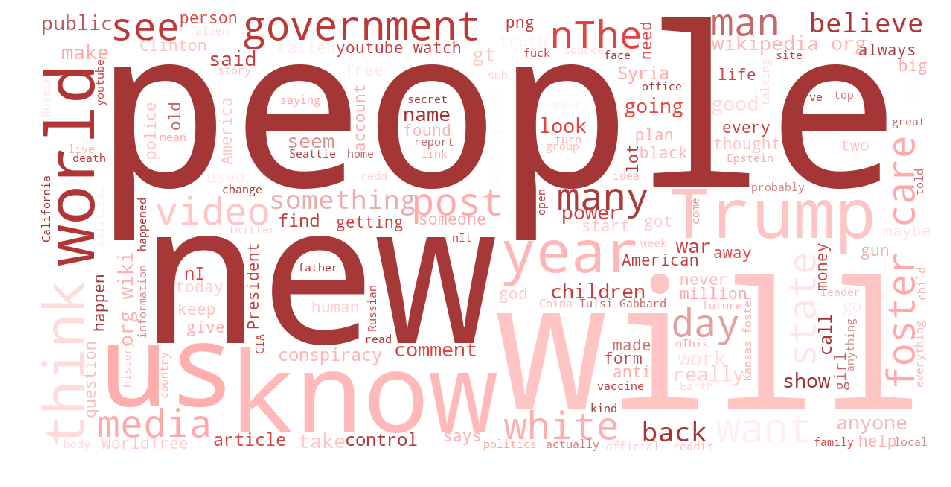

In [4]:
df_fake = p3.read('fake')
p3.wordcloud(df_fake.content,False)

In [ ]:
df_fake = p3.process(df_fake)
p3.wordcloud(df_fake.content,False)

In [ ]:
df_news = p3.read('news')
p3.wordcloud(df_news.content,True)

In [ ]:
df_news = p3.process(df_news)
p3.wordcloud(df_news.content,True)

In [ ]:
df = p3.merge(df_news,df_fake)
y = df.is_fake
df.drop('is_fake', inplace=True, axis=1)

In [ ]:
# Check whether target class is balanced

In [ ]:
y.value_counts(normalize=True)

In [ ]:
words = p3.features(df,y)

In [ ]:
#Decide what to put into the pipline, grid searh, and save the "best" for each grid search

vects = ['cv','tv']
models = ['mnb']

df_solns, X_train, X_test, y_train, train_score, test_score, y_test, y_test_hat, best_params = p3.search(vects,models,df,y)

In [ ]:
# V. Evaluate the model

In [ ]:
# Examine the best solutions from each call to the grid search

In [ ]:
df_solns = df_solns.sort_values(ascending=False, by='test_score',axis=1)

In [ ]:
# Best model

In [ ]:
df_solns.iloc[:,0:1]

In [ ]:
# Closely look at the parameters and see if we hit an boundary on our parameter options

In [ ]:
# Let's look at the parameters of one solution
df_solns.iloc[0,0]

In [ ]:
df_solns.iloc[4,0]

In [ ]:
best_alpha = list(df_solns.iloc[0,0].values())[0]
best_max_df = list(df_solns.iloc[0,0].values())[1]
best_max_features = list(df_solns.iloc[0,0].values())[2]
best_min_df = list(df_solns.iloc[0,0].values())[3]
best_ngram_range = list(df_solns.iloc[0,0].values())[4]
best_model = df_solns.iloc[1,0]
best_vect = df_solns.iloc[4,0]

In [ ]:
X_test['is_fake'] = y_test.values
X_test['pred_fake'] = y_test_hat
X_test_true = X_test[X_test["is_fake"] == X_test['pred_fake']]
X_test_false = X_test[X_test["is_fake"] != X_test['pred_fake']]

In [ ]:
# Remember, where y=1, the post is from r/CapeCod

In [ ]:
X_test_true

In [ ]:
X_test_false

In [ ]:
df_user = p3.get_input()

In [ ]:
df_user = p3.check_user(best_vect,best_max_df, best_min_df, best_ngram_range, best_max_features, best_model, best_alpha, df,df_user,y,is_fake=True)

In [ ]:
# df_user

In [ ]:
# True Negative (Real News, Predict Real News)

# "Brexit: Britain WILL leave EU by October 31 despite asking for delay, Gove insists as EU give Boris 48-hour lifeline"
# "Petrol bombs and tear gas scar Hong Kong streets as police, protesters clash"

In [ ]:
#False Negative (Fake News, Predict Real News)

#"Following a ban on face masks, protesters in Hong Kong use wearable face projectors that trick the facial recognition system used by the government"
#"Rep. Ilhan Omar protested outside Trump’s Oct. 10 campaign rally in Minneapolis"
#"Photo shows a Turkish soldier helping a child drink from a water bottle with the implication it was taken during the military offensive launched by Turkey last week in northern Syria"
#"A nighttime photo shows fires burning in mountains overlooking a shoreline during recent wildfires in Lebanon."
#"Video shows a banner stating “Betrayed and murdered the Kurdish people” hanging from Trump International Hotel in Las Vegas."

In [ ]:
# False Positive (Real News, Predict Fake News)

# "Indonesia's Widodo faces test on reform credentials in second term"

In [ ]:
# True Positive (Fake News, Predict Fake News)

# "Photo shows U.S. soldiers on the ground in Syria “crying and visibly shaken saying they could stop this in 10 minutes but Trump won’t let them.”
# "Photo shows a massive crowd in Baghdad demonstrating in early October against corruption."

In [ ]:
# tv = TfidfVectorizer(stop_words = stop(), max_df = best_max_df, min_df = best_min_df, ngram_range = best_ngram_range)
# mnb = MultinomialNB(alpha = best_alpha)
# is_fake = True
# df_user = check_user(tv,df,df_user,y,mnb,is_fake)

In [ ]:
# df_user

In [ ]:
# confusion_matrix(df_)

In [ ]:
# cv_simple = CountVectorizer(stop_words=stopwords)
# X_test_cv = cv_simple.fit_transform(X_test_incorrect['title'])
# cv_test = pd.DataFrame(X_test_cv.todense(), columns=cv_simple.get_feature_names())

In [ ]:
# Create a data frame of the most common words 
# n_words = 40
# words = list(cv_test.sum().sort_values(ascending=False)[:].index)
# print(words)

# cv_test['is_fake_test'] = X_test_incorrect['y'].values
# cv_test_small = cv_test.groupby('is_fake_test').sum()[words]

In [ ]:
# columns = [c for c in cv_test_small.columns if c in cv_train.columns]
# cv_train = cv_train[columns]
# cv_train['is_fake'] = y_train.values
# cv_train_small = cv_train.groupby('is_fake').sum()

# columns = [c for c in cv_train.columns if c in cv_test_small.columns]
# cv_test_small = cv_test_small[columns]

# cv_merge = pd.concat([cv_train_small, cv_test_small],keys=['train', 'incorrect'], sort=True)
# cv_merge.head()


In [ ]:
# Adapted from https://matplotlib.org/examples/api/barchart_demo.html

# words = cv_merge.columns
# n_words = len(words)
# words_count_fake_train = cv_merge.loc["train"].loc[0]
# words_count_news_train = cv_merge.loc["train"].loc[1]
# words_count_fake_wrong = cv_merge.loc["incorrect"].loc[0]
# words_count_news_wrong = cv_merge.loc["incorrect"].loc[1]

# width = 0.25       # the width of the bars
# ind = np.arange(n_words)

# fig, ax = plt.subplots(figsize=(15, 10))
# rects0 = ax.bar(ind,         words_count_fake_train, width, color=theme[0])
# rects1 = ax.bar(ind+width,   words_count_fake_wrong, width, color=theme[2])
# rects2 = ax.bar(ind+2*width, words_count_news_train, width, color=theme[3])
# rects3 = ax.bar(ind+3*width, words_count_news_wrong, width, color=theme[-1])

# # add some text for labels, title and axes ticks
# ax.set_ylabel('Counts')
# ax.set_title('Counts by word and reddit')
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels(words,rotation='vertical')

# ax.set_ylim(0,80)

# ax.legend((rects0, rects1, rects2, rects3), ('Fake News Train', 'Fake News Incorrect',
#                                                          'World News', 'World News Incorrect'));


In [ ]:
# This plot did not come out as well as I had hoped, but I think I can improve on it in the future

In [ ]:
# VI. Executive summary
# The data
# For this project, I chose two sub-reddits to compare, r/Cape Cod and r/galveston. As this was my first experience with Reddit, I had some challenege to come up with two forums to compare since most anything I chose did not have enough posts. With more experience with Reddit, I might have been able to chose more interesting topics to compare. Scraping was easy enough, but since the Reddits are not extremely active, I did not end up with as much data as I would have liked

# Exploring the data
# Once I had scraped the data, I ran a number of initial tests on it to get some insight. I used a word cloud to illustrate the word used most often in each subreddit. I then ran a vectorizer on unigrams and made some bar charts comparing the usage of the most words. The results were not particularly surprising, though there were some words I had not anticipated such as 'seawall' and 'gaming'.

# Modeling the problem
# From there, I dove into NLP. I ran a few simple tests, determined a baseline accuracy, and examined the coefficients determied by logistical regression. Again, the words with the most influence were not surprising - mostly place names or things unique to one place or the other. Actually, there was one word with a aurprisingly high coefficient - 'water'.

# Evaluate the model
# I then spent some time trying to generalize pipelines in order to efficiently run lots of different grid searches on many different models and parameters. This generalized function has room for improvement, but was quite helpful for me to stay organized in my tests. I saved the "best" from each test and turned the data into a dataframe in order to explore the incorrect predictions.

# Despite tuning the parameters, I could not get better than 83% accuracy, unfortunately.